In [1]:
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("house_price.csv")
data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [4]:
data.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [5]:
#Create a column for home age (current year - year built)
data['Age'] = 2024 - data['Year_Built']

In [6]:
data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,Age
0,1360,2,1,1981,0.599637,0,5,2.623829e+05,43
1,4272,3,3,2016,4.753014,1,6,9.852609e+05,8
2,3592,1,2,2016,3.634823,0,9,7.779774e+05,8
3,966,1,2,1977,2.730667,1,8,2.296989e+05,47
4,4926,2,1,1993,4.699073,0,8,1.041741e+06,31


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [9]:
X = data.drop(['House_Price', 'Year_Built'], axis=1)
y = data['House_Price']

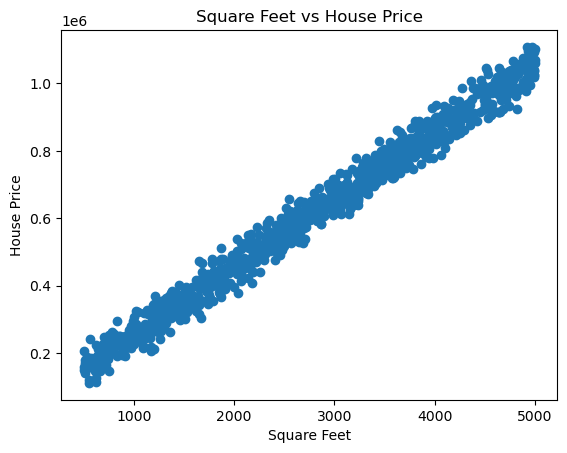

In [18]:
plt.scatter(X['Square_Footage'], y)
plt.xlabel('Square Feet')
plt.ylabel('House Price')
plt.title('Square Feet vs House Price')
plt.show()

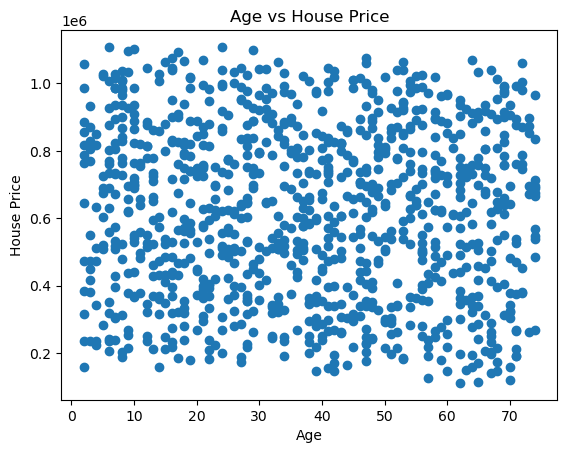

In [19]:
plt.scatter(X['Age'], y)
plt.xlabel('Age')
plt.ylabel('House Price')
plt.title('Age vs House Price')
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
pickle.dump(regressor, open('house.pkl', 'wb'))

In [13]:
model = pickle.load(open('house.pkl', 'rb'))

In [14]:
y_pred = model.predict(X_test)

In [15]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: ${mae:.2f}")
print(f"Mean Squared Error: ${mse:.2f}")
print(f"Root Mean Squared Error: ${rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")

Mean Absolute Error: $8174.58
Mean Squared Error: $101434798.51
Root Mean Squared Error: $10071.48
R-squared Score: 0.9984


In [16]:
print(model.predict([[1360,2,1,.599637,0,5,43]]))

[267127.74279254]


E:\Anaconda Navigator\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
